## Машинное обучение 1, ПМИ ФКН ВШЭ

## Практическое домашнее задание 1

### Общая информация

Дата выдачи: 11.09.2021

Мягкий дедлайн: 23:59MSK 25.09.2021

Жесткий дедлайн: 23:59MSK 28.09.2021

In [1]:
%config Completer.use_jedi = False

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после жёсткого дедлайна нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно получить у семинариста или ассистента. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода. 

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [2]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Ячейка с неразмеченыным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [3]:
# your code

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб? 

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [4]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Скачаем данные:

In [5]:
# !wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

In [6]:
# !powershell iwr -outf somefile https://somesite/somefile

In [7]:
# !pip install wget
# import wget 
# wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить ответ путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [8]:
data = pd.read_excel("end_seminar.xlsx")

In [9]:
data.tail(10)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
351,2020-05-18 23:58:33.903,8fe79f84f36e3a5d2d6745621321302c,1016,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Проектирование и разработка высоконагруженных ...,Символьные вычисления,Да,0.942029,174.0,DevOps,NaN
352,2020-05-18 23:59:20.831,f93afd8e92c336b471aa3bbbc579aefe,1298,NaN,NaN,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Методы сжатия и передачи медиаданных,Проектирование и разработка высоконагруженных ...,Конфликты и кооперация,Да,0.057971,175.0,DevOps,NaN
353,2020-05-18 23:59:28.998,9963fc00d9405a35b894cc04a7e19855,1135,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Безопасность компьютерных систем,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Символьные вычисления,Да,0.572464,175.0,DevOps,NaN
354,2020-05-19 08:55:39.509,98c5a2548d93f26bd4195466e93178b3,1035,NaN,NaN,Байесовские методы машинного обучения,Глубинное обучение в обработке звука,Statistical Learning Theory,Обучение с подкреплением,Генеративные модели в машинном обучении,Методы сжатия и передачи медиаданных,Нет,0.905797,171.0,DevOps,NaN
355,2020-05-19 18:58:06.283,ba298cbd9be59b84bab33325e956f27e,1155,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Байесовские методы машинного обучения,Анализ неструктурированных данных,Конфликты и кооперация,Обучение с подкреплением,Компьютерное зрение,Да,0.507246,171.0,Соревновательный анализ данных,NaN
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,NaN,NaN,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,NaN,NaN,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,NaN,NaN,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,NaN,0.369565,176.0,Соревновательный анализ данных,NaN


In [10]:
data.shape

(361, 16)

361 строка в таблице

In [11]:
data.describe()

,rating,18_group,is_mi,percentile,17_group,is_ml_student
count,361.000000,223.000000,18.0,361.000000,138.000000,57.0
mean,833.346260,184.520179,1.0,0.497230,173.355072,1.0
std,266.665103,2.271701,0.0,0.289071,1.795374,0.0
min,495.000000,181.000000,1.0,0.000000,171.000000,1.0
25%,613.000000,183.000000,1.0,0.246637,172.000000,1.0
50%,697.000000,185.000000,1.0,0.497758,173.000000,1.0
75%,1111.000000,187.000000,1.0,0.746377,175.000000,1.0
max,1457.000000,188.000000,1.0,0.995516,177.000000,1.0


In [12]:
data.dtypes

timestamp        datetime64[ns]
id                       object
rating                    int64
18_group                float64
is_mi                   float64
fall_1                   object
fall_2                   object
fall_3                   object
spring_1                 object
spring_2                 object
spring_3                 object
is_first_time            object
percentile              float64
17_group                float64
blended                  object
is_ml_student           float64
dtype: object

#### 2. [0.5 балла] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями?

In [13]:
(~data.isna()["18_group"]).sum()

223

In [14]:
data.groupby(by="18_group").sum()

,rating,is_mi,percentile,17_group,is_ml_student
18_group,,,,,
181.0,17771,0.0,10.627803,0.0,7.0
182.0,17942,1.0,7.000000,0.0,17.0
183.0,20024,0.0,16.834081,0.0,6.0
184.0,14478,4.0,11.856502,0.0,4.0
185.0,19242,4.0,16.968610,0.0,5.0
186.0,17054,3.0,13.318386,0.0,10.0
187.0,19067,1.0,21.000000,0.0,7.0
188.0,15562,5.0,13.394619,0.0,1.0


В таблице 223 заявок из групп 18-го года набора

In [15]:
(~data.isna()["17_group"]).sum()

138

И 138 заявок из групп 17-го года наборы

In [16]:
138 + 223

361

В таблице ровно 361 строка, то есть всё сходится и никто не потерян)

In [17]:
data["percentile"].unique().size

346

То есть в таблице всего 346 уникальных значений перцентиля, получается,
что студенты с равными перцентилями есть

#### 3. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [18]:
data.isna().sum()

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

Пропуски есть в колонках: 18_group (138), is_mi (343), is_first_time (2), 17_group (223), blended (223), is_ml_student (304)

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [19]:
data.fillna(value=dict.fromkeys(['is_first_time', 'blended'], ''), inplace=True)

In [20]:
data.fillna(value=dict.fromkeys(['18_group', 'is_mi', '17_group', 'is_ml_student'], 0),
            inplace=True)

In [21]:
data.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0


#### 4. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'. 

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. <i>Обращения со значением "Нет" в <code>is_first_time</code> могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [22]:
data[data['is_first_time'] == 'Нет'].shape

(51, 16)

В таблице 51 записей с ответом "Нет"

In [23]:
data = data.sort_values(by=['id', 'is_first_time', 'timestamp'])

In [24]:
data = data.drop_duplicates(subset=['id'], keep='last')

In [25]:
data.shape

(347, 16)

Так как я рассматривала только дубликаты, то записи, которые были единичными, где человек по ошибке указал "Нет", не были удалены

#### 5. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из курсов собрались студенты с самым высоким средним рейтингом? 

In [26]:
data[data['18_group'] != 0].blended.unique()

array([''], dtype=object)

In [27]:
data[data['17_group'] != 0].blended.unique()

array(['Соревновательный анализ данных', 'DevOps',
       'Введение в дифференциальную геометрию'], dtype=object)

Всего три blended-курса для четверокурсников (групп 17 года поступления), они представлены выше

In [28]:
data[data['17_group'] != 0].groupby('blended').size()

blended
DevOps                                   87
Введение в дифференциальную геометрию    15
Соревновательный анализ данных           32
dtype: int64

Больше всего студенов записаловь на курас "DevOps", меньше всего на "Введение в дифференциальную геометрию"

In [29]:
data[data['17_group'] != 0].groupby('blended').mean()['rating']

blended
DevOps                                   1154.172414
Введение в дифференциальную геометрию    1210.733333
Соревновательный анализ данных           1144.218750
Name: rating, dtype: float64

Самый высокий стредний рейтинг на курсе "Введение в дифференциальную геометрию", самый низкий на курсе "Соревновательный анализ данных"

#### 6. [1 балл] Выясните, есть ли в данных студенты с абсолютно одинаковыми предпочтениями по всем курсам (не забудьте учесть blended-курсы для четверокурсников). Сколько таких наборов, которые взяли несколько студентов? Выведите их все вместе с количеством выбравших их студентов.

<i>Предпочтения двух студентов считаются абсолютно одинаковыми, если выбранные ими дисциплины имеют одинаковый приоритет.</i>

In [30]:
data.head(3)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Анализ данных в бизнесе,Да,0.896861,0.0,,0.0
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,Дискретная оптимизация,Да,0.892377,0.0,,0.0
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,Символьные вычисления,Да,0.847826,173.0,Соревновательный анализ данных,0.0


In [31]:
data.duplicated(
    subset=['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'],
    keep='first').sum()

17

In [32]:
mask = data.duplicated(
    subset=['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'],
    keep=False)
mask.sum()

32

В таблице имеется 17 совпадений

In [33]:
grouped = data[mask].groupby(
    by=['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'])

In [34]:
pd.DataFrame(grouped['id'].count())

id
fall_1                                          fall_2                                          fall_3                                          spring_1                                           spring_2                                    spring_3                                    blended    
Statistical Learning Theory                     Анализ неструктурированных данных               Сбор и обработка данных с помощью краудсорсинга Обучение с подкреплением                           Конфликты и кооперация                      Компьютерное зрение                         DevOps    2
Байесовские методы машинного обучения           Анализ неструктурированных данных               Глубинное обучение в обработке звука            Обучение с подкреплением                           Генеративные модели в машинном обучении     Компьютерное зрение                         DevOps    2
                                                                                                Сбор и обработка данных с помощью краудсорсинга Обучение с подкреплением                           Компьютерное зрение                         Генеративные модели в машинном обучении     DevOps    2
Безопасность компьютерных систем                Statistical Learning Theory                     Матричные вычисления                            Дискретная оптимизация                             Промышленное программирование на языке Java Дополнительные главы прикладной статистики            3
                                                Высокопроизводительные вычисления               Анализ неструктурированных данных               Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Конфликты и кооперация                      DevOps    2
                                                                                                Язык SQL                                        Компьютерные сети                                  Промышленное программирование на языке Java Дискретная оптимизация                                3
                                                                                                                                                Промышленное программирование на языке Java        Компьютерные сети                           Системы баз данных                                    2
                                                Матричные вычисления                            Моделирование временных рядов                   Промышленное программирование на языке Java        Компьютерные сети                           Дискретная оптимизация                                2
                                                Сбор и обработка данных с помощью краудсорсинга Матричные вычисления                            Компьютерные сети                                  Промышленное программирование на языке Java Анализ данных в бизнесе                               2
                                                Теория баз данных                               Язык SQL                                        Машинное обучение 2                                Компьютерные сети                           Промышленное программирование на языке Java           2
Высокопроизводительные вычисления               Безопасность компьютерных систем                Сбор и обработка данных с помощью краудсорсинга Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Компьютерное зрение                         DevOps    2
                                                Сбор и обработка данных с помощью краудсорсинга Моделирование временных рядов                   Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Методы сжатия и передачи медиаданных        DevOps    2
Моделирование временных рядов                   Сбор и обработка данных с помощью краудсорсинга Безопасность компьютерных систем                Компьютерные сети 

Вывод получился в формате групп, но тем не менее он отражает поставленную задачу и показывает, сколько студентов выбрали одинаковый набор предметов

#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [35]:
set_subj = set()
for col in ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']:
    set_subj.update(set(data[col].unique()))
len(set_subj)

31

Всего существует 31 различный курс по выбору (включая blended-курсы)

In [36]:
len(data['fall_1'].unique()) + len(data['spring_1'].unique()) + len(data['blended'].unique())

31

Размеры совпали, таким образом, колонки 'fall_1', 'spring_1' и 'blended' полностью содержат весь набор курсов, поэтому можно рассматривать только их

In [37]:
data[(data['blended'] != '') & (data['18_group'] != 0)].shape

(0, 16)

Это было очевидно, но я перепроверила, что множество blended-курсов не пересекается с множеством всех стальных курсов по выбору, поэтому эту колонку можно не рассматривать при нахождении курсов, которые выбирают студенты 17-го и 18-го годов

In [38]:
set_17 = set(data.loc[data['17_group'] != 0, 'fall_1'].unique())
set_17.update(set(data.loc[data['17_group'] != 0, 'spring_1'].unique()))
set_18 = set(data.loc[data['18_group'] != 0, 'fall_1'].unique())
set_18.update(set(data.loc[data['18_group'] != 0, 'spring_1'].unique()))

intersection = set_17.intersection(set_18)
intersection

{'Statistical Learning Theory',
 'Безопасность компьютерных систем',
 'Высокопроизводительные вычисления',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Сбор и обработка данных с помощью краудсорсинга',
 'Численные методы'}

Это курсы, на которые записывались студенты и 17-го и 18-го года

Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [39]:
set_17.difference(intersection)

{'Анализ неструктурированных данных',
 'Байесовские методы машинного обучения',
 'Генеративные модели в машинном обучении',
 'Глубинное обучение в обработке звука',
 'Компьютерное зрение',
 'Конфликты и кооперация',
 'Методы сжатия и передачи медиаданных',
 'Обучение с подкреплением',
 'Проектирование и разработка высоконагруженных сервисов',
 'Символьные вычисления'}

Это курсы, на которые записывались только студенты 18-го года

In [40]:
set_18.difference(intersection)

{'Анализ данных в бизнесе',
 'Дискретная оптимизация',
 'Дополнительные главы прикладной статистики',
 'Компьютерные сети',
 'Матричные вычисления',
 'Машинное обучение 2',
 'Промышленное программирование на языке Java',
 'Системы баз данных',
 'Теория баз данных',
 'Язык SQL'}

Это курсы, на которые записывались только студенты 17-го года

### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Полезные строчки:
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data.head(3)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Анализ данных в бизнесе,Да,0.896861,0.0,,0.0
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,Дискретная оптимизация,Да,0.892377,0.0,,0.0
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,Символьные вычисления,Да,0.847826,173.0,Соревновательный анализ данных,0.0


#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

In [43]:
from matplotlib.backends.backend_pdf import PdfPages

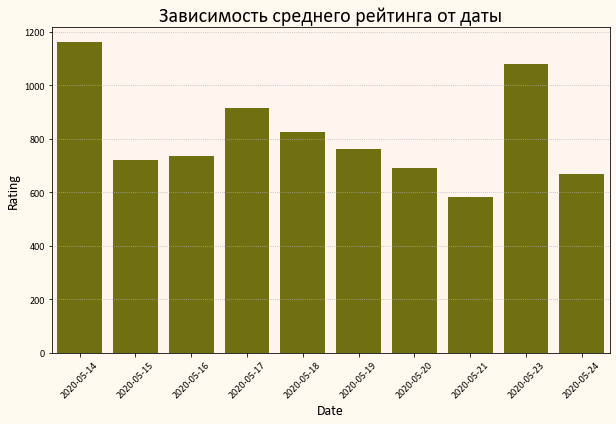

In [44]:
pp = PdfPages('bar_plot.pdf')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Calibri'

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot()

sns.barplot(
    x=sort(data.timestamp.dt.date.unique()),
    y=data.groupby(by=data.timestamp.dt.date)['rating'].mean(),
    color='olive')

ax.tick_params(axis='x', labelrotation=45)

ax.grid(axis='y', linestyle=':')

fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Rating', fontsize=14)
ax.set_title('Зависимость среднего рейтинга от даты', fontsize=20)

pp.savefig()
pp.close()

Сохраните график в формате pdf (так он останется векторизованным).

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Добавила необходимые строки для сохраниения в pdf в ячейку выше

### 2. Распределение студентов по курсам.

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом, и места заполняются лучшими по перцентили рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. <i>Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются. Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо</i>.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * три столбца: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * Формат csv: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [45]:
assert data.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert data.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [46]:
data['fall_course_amount'] = np.ones(data.shape[0])
data.loc[data['17_group'].isin([171, 172, 173]), 'fall_course_amount'] = 2
data.loc[(data['is_mi'] == 1), 'fall_course_amount'] = 2
data.head(3)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_course_amount
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Анализ данных в бизнесе,Да,0.896861,0.0,,0.0,1.0
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,Дискретная оптимизация,Да,0.892377,0.0,,0.0,1.0
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,Символьные вычисления,Да,0.847826,173.0,Соревновательный анализ данных,0.0,2.0


Проверка:

In [47]:
col_name = 'fall_course_amount'    # insert your new column name as str
df = data

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [48]:
set_subj = set()
for col in ['fall_1', 'fall_2', 'fall_3']:
    set_subj.update(set(data[col].unique()))
len(set_subj)

12

Всего 12 предметов по выбору на осень

In [49]:
dict_subj = dict.fromkeys(set_subj, 30)
dict_subj['Statistical Learning Theory'] = 60
dict_subj['Высокопроизводительные вычисления'] = 60
dict_subj['Анализ неструктурированных данных'] = 400  # так как мест не ограниченно

In [50]:
dict_subj

{'Глубинное обучение в обработке звука': 30,
 'Матричные вычисления': 30,
 'Теория баз данных': 30,
 'Сбор и обработка данных с помощью краудсорсинга': 30,
 'Анализ неструктурированных данных': 400,
 'Безопасность компьютерных систем': 30,
 'Принятие решений в условиях риска и неопределённости': 30,
 'Язык SQL': 30,
 'Statistical Learning Theory': 60,
 'Байесовские методы машинного обучения': 30,
 'Моделирование временных рядов': 30,
 'Высокопроизводительные вычисления': 60}

In [51]:
for col in ['elective_course_1', 'elective_course_2']:
    data[col] = np.full(data.shape[0], fill_value='-')

In [52]:
for subj, course_size in dict_subj.items():
    # выбираем топ студентов с данным приоритетом
    tmp_pool = data[(data['fall_1'] == subj) |
                    ((data['fall_course_amount'] == 2) & (data['fall_2'] == subj))].copy()
    if tmp_pool.shape[0] > course_size:
        tmp_pool = tmp_pool.sort_values(by='percentile')
        tmp_pool = tmp_pool[0:course_size]
    
    # добавим распределение по курсам
    tmp_pool_1 = tmp_pool[tmp_pool['elective_course_1'] == '-'].copy()
    tmp_pool_2 = tmp_pool[tmp_pool['elective_course_1'] != '-'].copy()
    
    data.loc[data['id'].isin(tmp_pool_1['id']), 'elective_course_1'] = subj
    data.loc[data['id'].isin(tmp_pool_2['id']), 'elective_course_2'] = subj

Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен 
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [53]:
check_df = pd.read_csv('2_task_check.csv')

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [54]:
for col in ['is_first_place', 'is_last_place']:
    data[col] = np.full(shape=data.shape[0], fill_value=np.nan)

for subj, v in dict_subj.items():
    tmp = data[(data['elective_course_1'] == subj) | 
               ((data['fall_course_amount'] == 2) & (data['elective_course_2'] == subj))].copy()
    tmp = tmp.sort_values('percentile')
    
    data.loc[data['id'] == tmp.iloc[0]['id'], 'is_first_place'] = True
    data.loc[data['id'] == tmp.iloc[-1]['id'], 'is_last_place'] = True

In [55]:
fir_col_name = 'is_first_place'      # insert name of your new column with is_first_place as str
last_col_name = 'is_last_place'     # insert name of your new column with is_last_place as str
df = data.copy()

assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       == 
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

Вторая волна:

In [56]:
# чтобы знать сколько мест осталось
phase_2_dict_subj = {}
for subj, course_size in dict_subj.items():
    enrolled_count = data[((data['elective_course_1'] == subj) |
                           (data['elective_course_2'] == subj))].shape[0]
    if enrolled_count < course_size:
        phase_2_dict_subj[subj] = course_size - enrolled_count

phase_2_dict_subj

{'Глубинное обучение в обработке звука': 7,
 'Матричные вычисления': 15,
 'Теория баз данных': 16,
 'Анализ неструктурированных данных': 352,
 'Принятие решений в условиях риска и неопределённости': 22,
 'Язык SQL': 1,
 'Statistical Learning Theory': 27,
 'Байесовские методы машинного обучения': 6,
 'Высокопроизводительные вычисления': 16}

In [57]:
for subj, course_size in phase_2_dict_subj.items():
    tmp_pool = data[(((data['fall_2'] == subj) &
                     (data['fall_course_amount'] == 1) &
                     (data['elective_course_1'] == '-'))
                    |
                    ((data['fall_3'] == subj) &
                     (data['fall_course_amount'] == 2) &
                     (data['elective_course_2'] == '-')))].copy()
    if tmp_pool.shape[0] > course_size:
        tmp_pool = tmp_pool.sort_values(by='percentile')
        tmp_pool = tmp_pool[0:course_size]
        
    # добавим распределение по курсам
    tmp_pool_1 = tmp_pool[tmp_pool['elective_course_1'] == '-'].copy()
    tmp_pool_2 = tmp_pool[(tmp_pool['fall_course_amount'] == 2) & 
                          (tmp_pool['elective_course_2'] == '-') &
                          (tmp_pool['elective_course_1'] != '-') &
                          (tmp_pool['elective_course_1'] != subj)].copy()
    data.loc[data['id'].isin(tmp_pool_1['id']), 'elective_course_1'] = subj
    data.loc[data['id'].isin(tmp_pool_2['id']), 'elective_course_2'] = subj

Третья волна:

In [58]:
phase_3_dict_subj = {}
for subj, course_size in dict_subj.items():
    enrolled_count = data[((data['elective_course_1'] == subj) |
                           (data['elective_course_2'] == subj))].shape[0]
    if enrolled_count < course_size:
        phase_3_dict_subj[subj] = course_size - enrolled_count

phase_3_dict_subj

{'Матричные вычисления': 6,
 'Теория баз данных': 12,
 'Анализ неструктурированных данных': 347,
 'Принятие решений в условиях риска и неопределённости': 21,
 'Statistical Learning Theory': 19,
 'Байесовские методы машинного обучения': 5,
 'Высокопроизводительные вычисления': 1}

In [59]:
for subj, course_size in phase_3_dict_subj.items():
    tmp_pool = data[((data['fall_3'] == subj) &
                     (data['fall_course_amount'] == 1) &
                     (data['elective_course_1'] == '-'))].copy()
    if tmp_pool.shape[0] > course_size:
        tmp_pool = tmp_pool.sort_values(by='percentile')
        tmp_pool = tmp_pool[0:course_size]
        
    # добавим распределение по курсам
    data.loc[data['id'].isin(tmp_pool['id']), 'elective_course_1'] = subj

Дозаполнение таблицы:

In [60]:
data.loc[data['elective_course_1'] == '-', 'elective_course_1'] = '???'
data.loc[(data['fall_course_amount'] == 2) & (data['elective_course_2'] == '-'),
         'elective_course_2'] = '???'

**Отправьте свой файл res_fall.csv в контест (https://contest.yandex.ru/contest/29176/problems/A/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

Мне так и не удалось установить, почему 2 студента распределились не корректно (при этом тот же самый код отрабатывает корректно на распределении на весенние курсы), поэтому удалось достичь только результата "guessed 345 out of 347", ссылка прикреплена ниже.
При этом мой алгоритм учитывает случаи, когда студенты по ошибке указали один и тот же предмет в приоритетах, ниже доказательство того, что никто не был зачислен дважды на один курс:

In [61]:
data[(data['elective_course_1'] == data['elective_course_2'])]

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,is_first_time,percentile,17_group,blended,is_ml_student,fall_course_amount,elective_course_1,elective_course_2,is_first_place,is_last_place
299,2020-05-18 19:36:56.962,0c0cbdd1a309c1d1fd8993c4dc907bb5,1065,0.0,0.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Компьютерное зрение,Методы сжатия и передачи медиаданных,...,Да,0.833333,172.0,Соревновательный анализ данных,0.0,2.0,???,???,NaN,NaN
295,2020-05-18 18:27:32.822,7fcf56aae6836855a689000a50e80360,1145,0.0,0.0,Безопасность компьютерных систем,Безопасность компьютерных систем,Безопасность компьютерных систем,Символьные вычисления,Символьные вычисления,...,Да,0.536232,173.0,Введение в дифференциальную геометрию,0.0,2.0,???,???,NaN,NaN


https://contest.yandex.ru/contest/29176/run-report/53497678/

Я была авторизирована под именем Polina Cherepanova

*Дисклеймер:*

Контест выдаётся для самопроверки. Если ваша посылка получила ОК, то код, скорее всего, правильный. Но при этом оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат.

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask

In [62]:
df = pd.DataFrame(data=data[['id', 'elective_course_1', 'elective_course_2']])
df = df.rename(columns={'id' : 'ID',
                        'elective_course_1' : 'course1',
                        'elective_course_2' : 'course2'})
df.to_csv('res_fall.csv', index=None)

**Дополнительное задание. [2 бонусных балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.**

Если ваш код был хорошо структурирован, то это не составит проблем. 

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

Новый признак, для обозначения, сколько весенних курсов нужно выбрать

Для студентов специализации МОП, выбравших Машинное обучение 2 в качестве курса по выбору сдвину приоритеты согласно условию:

In [63]:
# буду использовать для этого другую таблицу
spr_data = data.copy()
spr_data.loc[(spr_data['is_ml_student'] == 1) & (spr_data['spring_3'] == 'Машинное обучение 2'),
        'spring_3'] = '-'
spr_data.loc[(spr_data['is_ml_student'] == 1) & (spr_data['spring_2'] == 'Машинное обучение 2'),
        'spring_2'] = spr_data['spring_3']

In [64]:
t = list(spr_data.loc[(spr_data['is_ml_student'] == 1) & (spr_data['spring_1'] == 'Машинное обучение 2'),
                 'id'].to_numpy())
spr_data.loc[spr_data['id'].isin(t), 'spring_1'] = spr_data.loc[spr_data['id'].isin(t), 'spring_2']
spr_data.loc[spr_data['id'].isin(t), 'spring_2'] = spr_data.loc[spr_data['id'].isin(t), 'spring_3']
spr_data.loc[spr_data['id'].isin(t), 'spring_3'] = '-'

In [65]:
spr_data[(spr_data['is_ml_student'] == 1) & 
     (
         (spr_data['spring_1'] == 'Машинное обучение 2')
         |
         (spr_data['spring_2'] == 'Машинное обучение 2')
         |
         (spr_data['spring_3'] == 'Машинное обучение 2')
     )][['spring_1','spring_2','spring_3']]

,spring_1,spring_2,spring_3


In [66]:
spr_data['spring_course_amount'] = np.ones(spr_data.shape[0])
spr_data.loc[spr_data['17_group'].isin([171, 172, 173]), 'spring_course_amount'] = 2
spr_data.head(3)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,percentile,17_group,blended,is_ml_student,fall_course_amount,elective_course_1,elective_course_2,is_first_place,is_last_place,spring_course_amount
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,...,0.896861,0.0,,0.0,1.0,Матричные вычисления,-,NaN,NaN,1.0
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,...,0.892377,0.0,,0.0,1.0,Statistical Learning Theory,-,NaN,NaN,1.0
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,...,0.847826,173.0,Соревновательный анализ данных,0.0,2.0,Анализ неструктурированных данных,???,NaN,NaN,2.0


In [67]:
spr_set_subj = set()
for col in ['spring_1', 'spring_2', 'spring_3']:
    spr_set_subj.update(set(spr_data[col].unique()))
len(spr_set_subj)

16

In [68]:
spr_set_subj

{'-',
 'Анализ данных в бизнесе',
 'Генеративные модели в машинном обучении',
 'Дискретная оптимизация',
 'Дополнительные главы прикладной статистики',
 'Компьютерное зрение',
 'Компьютерные сети',
 'Конфликты и кооперация',
 'Машинное обучение 2',
 'Методы сжатия и передачи медиаданных',
 'Обучение с подкреплением',
 'Проектирование и разработка высоконагруженных сервисов',
 'Промышленное программирование на языке Java',
 'Символьные вычисления',
 'Системы баз данных',
 'Численные методы'}

In [69]:
spr_dict_subj = dict.fromkeys(spr_set_subj, 30)
spr_dict_subj['Обучение с подкреплением'] = 60
spr_dict_subj['Анализ данных в бизнесе'] = 60

In [70]:
for col in ['spr_elective_course_1', 'spr_elective_course_2']:
    spr_data[col] = np.full(spr_data.shape[0], fill_value='-')

In [71]:
for subj, course_size in spr_dict_subj.items():
    # выбираем топ студентов с данным приоритетом
    tmp_pool = spr_data[(spr_data['spring_1'] == subj) |
                    ((spr_data['spring_course_amount'] == 2) &
                     (spr_data['spring_2'] == subj))].copy()
    if tmp_pool.shape[0] > course_size:
        tmp_pool = tmp_pool.sort_values(by='percentile')
        tmp_pool = tmp_pool[0:course_size]
    
    # добавим распределение по курсам
    tmp_pool_1 = tmp_pool[tmp_pool['spr_elective_course_1'] == '-'].copy()
    tmp_pool_2 = tmp_pool[tmp_pool['spr_elective_course_1'] != '-'].copy()
    
    spr_data.loc[spr_data['id'].isin(tmp_pool_1['id']), 'spr_elective_course_1'] = subj
    spr_data.loc[spr_data['id'].isin(tmp_pool_2['id']), 'spr_elective_course_2'] = subj

In [72]:
spr_phase_2_dict_subj = {}
for subj, course_size in spr_dict_subj.items():
    enrolled_count = spr_data[((spr_data['spr_elective_course_1'] == subj) |
                           (spr_data['spr_elective_course_2'] == subj))].shape[0]
    if enrolled_count < course_size:
        spr_phase_2_dict_subj[subj] = course_size - enrolled_count

spr_phase_2_dict_subj

{'Численные методы': 21,
 'Генеративные модели в машинном обучении': 14,
 'Конфликты и кооперация': 11,
 'Компьютерное зрение': 1,
 'Анализ данных в бизнесе': 41,
 'Системы баз данных': 22,
 'Методы сжатия и передачи медиаданных': 8,
 'Дополнительные главы прикладной статистики': 19,
 'Символьные вычисления': 21}

In [73]:
for subj, course_size in spr_phase_2_dict_subj.items():
    tmp_pool = spr_data[(((spr_data['spring_2'] == subj) &
                     (spr_data['spring_course_amount'] == 1) &
                     (spr_data['spr_elective_course_1'] == '-'))
                    |
                    ((spr_data['spring_3'] == subj) &
                     (spr_data['spring_course_amount'] == 2) &
                     (spr_data['spr_elective_course_2'] == '-')))].copy()
    if tmp_pool.shape[0] > course_size:
        tmp_pool = tmp_pool.sort_values(by='percentile')
        tmp_pool = tmp_pool[0:course_size]
        
    # добавим распределение по курсам
    tmp_pool_1 = tmp_pool[tmp_pool['spr_elective_course_1'] == '-'].copy()
    tmp_pool_2 = tmp_pool[(tmp_pool['spring_course_amount'] == 2) & 
                          (tmp_pool['spr_elective_course_2'] == '-') &
                          (tmp_pool['spr_elective_course_1'] != '-') &
                          (tmp_pool['spr_elective_course_1'] != subj)].copy()
    spr_data.loc[spr_data['id'].isin(tmp_pool_1['id']), 'spr_elective_course_1'] = subj
    spr_data.loc[spr_data['id'].isin(tmp_pool_2['id']), 'spr_elective_course_2'] = subj

In [74]:
spr_phase_3_dict_subj = {}
for subj, course_size in spr_dict_subj.items():
    enrolled_count = spr_data[((spr_data['spr_elective_course_1'] == subj) |
                           (spr_data['spr_elective_course_2'] == subj))].shape[0]
    if enrolled_count < course_size:
        spr_phase_3_dict_subj[subj] = course_size - enrolled_count

spr_phase_3_dict_subj

{'Численные методы': 16,
 'Генеративные модели в машинном обучении': 12,
 'Конфликты и кооперация': 10,
 'Анализ данных в бизнесе': 32,
 'Системы баз данных': 19,
 'Методы сжатия и передачи медиаданных': 2,
 'Дополнительные главы прикладной статистики': 16,
 'Символьные вычисления': 20}

In [75]:
for subj, course_size in spr_phase_3_dict_subj.items():
    tmp_pool = spr_data[((spr_data['spring_3'] == subj) &
                     (spr_data['spring_course_amount'] == 1) &
                     (spr_data['spr_elective_course_1'] == '-'))].copy()
    if tmp_pool.shape[0] > course_size:
        tmp_pool = tmp_pool.sort_values(by='percentile')
        tmp_pool = tmp_pool[0:course_size]
        
    # добавим распределение по курсам
    spr_data.loc[spr_data['id'].isin(tmp_pool['id']), 'spr_elective_course_1'] = subj

In [76]:
spr_data.loc[spr_data['spr_elective_course_1'] == '-', 'spr_elective_course_1'] = '???'
spr_data.loc[(spr_data['spring_course_amount'] == 2) & (spr_data['spr_elective_course_2'] == '-'),
         'spr_elective_course_2'] = '???'

In [77]:
df = pd.DataFrame(data=spr_data[['id', 'spr_elective_course_1', 'spr_elective_course_2']])
df = df.rename(columns={'id' : 'ID',
                        'spr_elective_course_1' : 'course1',
                        'spr_elective_course_2' : 'course2'})
df.to_csv('res_spring.csv', index=None)

**Отправьте свой файл res_spring.csv в контест (https://contest.yandex.ru/contest/29176/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

https://contest.yandex.ru/contest/29176/run-report/53496937/

Я была авторизирована под именем Polina Cherepanova

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask

Вставьте картинку, описывающую ваш опыт выполнения этого задания:

http://sun9-25.userapi.com/c630320/u90004249/video/l_7755e5d4.jpg